In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def preProcessText(text):
    # put space in beteen the | -> devanagari danda to make it a separate word.
    text = re.sub(r'\s*[\u0964]\s*', r'\u0020\u0964\u0020', text)
    # put space around the question mark ?  to make it a separate word
    text = re.sub(r'\s*[\u003f]\s*', r'\u0020\u003f\u0020', text)
    # put space in between comma(,)
    text = re.sub(r'\s*[\u002c]\s*', r'\u0020\u002c\u0020', text)
    # remove space around the new line character
    text = re.sub(r'\s*\n\s*','\n', text)
    # replace any non-devangari string with a blank
    text = re.sub(r'[^\u0900-\u097F,?\s+]','', text) 
    # add space in between the devanagari numbers and replace number by <num> token
    text = re.sub(r'\s*[\u0966-\u0976]+\s*', '\u0020<num>\u0020', text)
    return text

In [3]:
file_path = 'data/preprocessed_ne_dedup.txt'
if not os.path.exists(file_path):
    with open('data/ne_dedup.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        print("Preprocessing file")
        text = preProcessText(text)
    with open('data/preprocessed_ne_dedup.txt', 'w', encoding='utf-8') as f:
        f.write(text)
else:
    print(f"Reading file  : {file_path}")
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

Reading file  : data/preprocessed_ne_dedup.txt


In [4]:
paragraph_list = text.split('\n')
print(len(paragraph_list))

319566


In [5]:
import statistics

def printDescriptiveStatistics(data):
    # Sorting the list
    sorted_data = sorted(data)
    
    # Calculating quartiles
    Q1 = statistics.median(sorted_data[:len(sorted_data)//2])
    Q2 = statistics.median(sorted_data)
    Q3 = statistics.median(sorted_data[(len(sorted_data)+1)//2:])
    
    # Calculating minimum, maximum, and mean
    minimum = min(sorted_data)
    maximum = max(sorted_data)
    mean = statistics.mean(sorted_data)
    
    print("First Quartile (Q1):", Q1)
    print("Second Quartile (Median):", Q2)
    print("Third Quartile (Q3):", Q3)
    print("Minimum:", minimum)
    print("Maximum:", maximum)
    print("Mean:", mean)

### No. of words per paragraph distribution

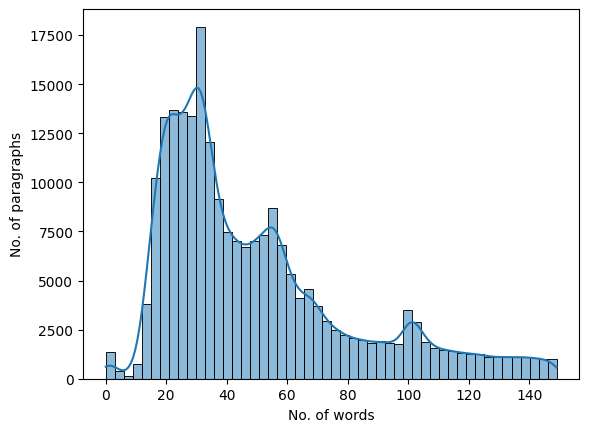

First Quartile (Q1): 31
Second Quartile (Median): 59.0
Third Quartile (Q3): 210
Minimum: 0
Maximum: 17904
Mean: 232.78749303743203


In [7]:
no_of_words_per_paragraph = [len(paragraph_list[i].split()) for i in range(len(paragraph_list))]
len(no_of_words_per_paragraph)

# obtain values for the no. cut_off of 150 words per paragraphs
no_of_words_per_paragraph_lt_cut_off = []
cut_off = 150
for num in no_of_words_per_paragraph:
    if num < cut_off:
        no_of_words_per_paragraph_lt_cut_off.append(num)

sns.histplot(no_of_words_per_paragraph_lt_cut_off, bins=50, kde=True)

# Set labels and title
plt.xlabel('No. of words')
plt.ylabel('No. of paragraphs')

# Show the plot
plt.show()

printDescriptiveStatistics(no_of_words_per_paragraph)

## No. of sentences per paragraphs

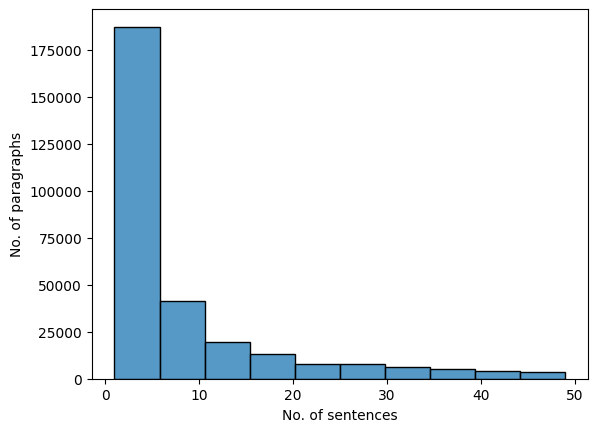

First Quartile (Q1): 2
Second Quartile (Median): 4.0
Third Quartile (Q3): 13
Minimum: 1
Maximum: 1060
Mean: 14.380406551385317


In [9]:
no_of_sentences_per_paragraph = [len(paragraph_list[i].split('।')) for i in range(len(paragraph_list))]
len(no_of_sentences_per_paragraph)

# obtain values for the no. cut_off of 150 words per paragraphs
no_of_sentences_per_paragraph_lt_cut_off = []

cut_off = 50
for num in no_of_sentences_per_paragraph:
    if num < cut_off:
        no_of_sentences_per_paragraph_lt_cut_off.append(num)

sns.histplot(no_of_sentences_per_paragraph_lt_cut_off, bins=10, kde=False)

# Set labels and title
plt.xlabel('No. of sentences')
plt.ylabel('No. of paragraphs')

# Show the plot
plt.show()

printDescriptiveStatistics(no_of_sentences_per_paragraph)

## No. of vocab vs the min. number of frequency per words

In [10]:
from collections import Counter

In [11]:
def obtainWordCount(text):
    words = text.split()
    word_freq = Counter(words)
    return word_freq

In [12]:
word_freq = obtainWordCount(text)

In [13]:
for word, freq in word_freq.items():
    print(f"{word}: {freq}")
    break

बर्दिबास: 291


In [14]:
vocab_length_per_cut_off_freq = {}
for cut_off_freq in range(50):
    vocab_length = sum(1 for freq in word_freq.values() if freq > cut_off_freq)
    vocab_length_per_cut_off_freq[cut_off_freq] = vocab_length

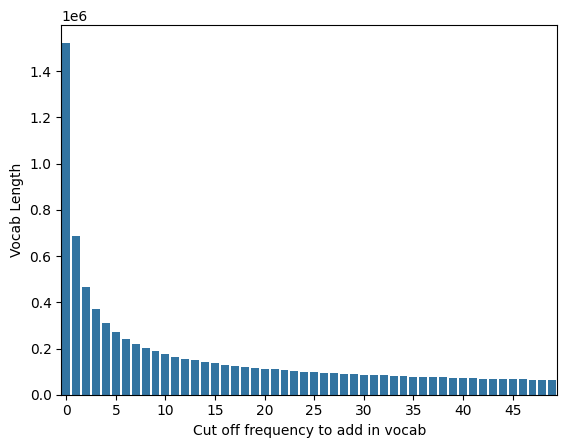

In [15]:
# Extract keys and values
keys = list(vocab_length_per_cut_off_freq.keys())
values = list(vocab_length_per_cut_off_freq.values())

# Create bar plot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Cut off frequency to add in vocab')
plt.ylabel('Vocab Length')

plt.xticks(range(0, len(keys), 5), keys[::5])
# Show plot
plt.show()

## Most frequent vocabs

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

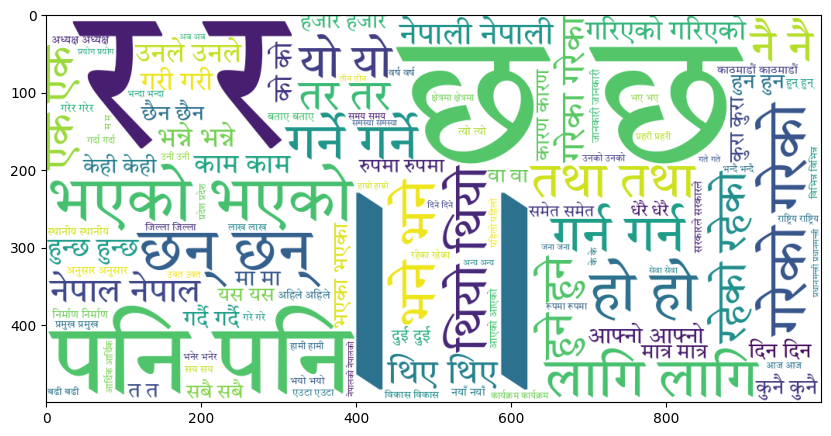

In [17]:
top_words = word_freq.most_common(1000)

# Print the top 100 words with their frequencies
corpus = ''
for word, frequency in top_words:
    normalized_freq = int(frequency / 10_000)
    tmp_word = word + " "
    corpus += tmp_word * normalized_freq

font1 = "TiroDevanagariHindi-Regular.ttf"
wordcloud1 = WordCloud(width = 1000, height = 500, background_color = "white", min_font_size = 10, regexp=r"[\u0900-\u097F]+", font_path = font1).generate(corpus)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1)

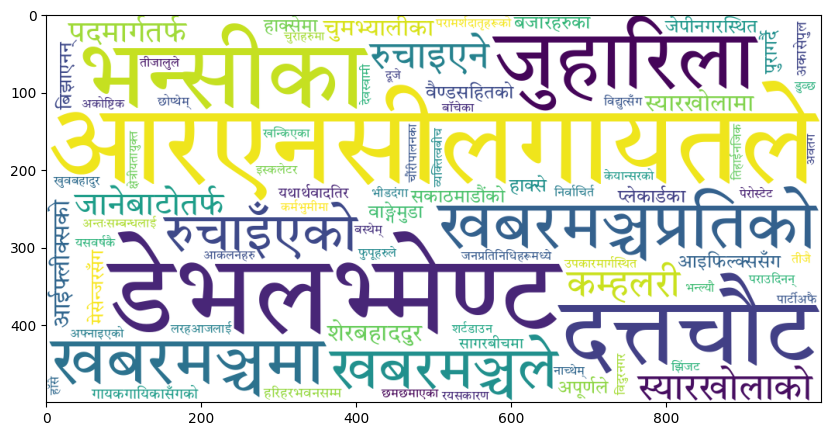

In [18]:
top_words = word_freq.most_common()[:-301:-1]

# Print the top 100 words with their frequencies
corpus = ''
for word, frequency in top_words:
    normalized_freq = frequency
    tmp_word = word + " "
    corpus += tmp_word * normalized_freq

font1 = "TiroDevanagariHindi-Regular.ttf"
wordcloud1 = WordCloud(width = 1000, height = 500, background_color = "white", min_font_size = 10, regexp=r"[\u0900-\u097F]+", font_path = font1).generate(corpus)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1)